# PRECIPITATION DATA ANALYSIS OVER SOUTH AFRICA

# IMPORT LIBRARIES

In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from warnings import filterwarnings


In [2]:
SA_dataset=xr.open_dataset('South_Africa.nc')
SA_dataset


<xarray.Dataset>
Dimensions:   (datetime: 3652, lon: 68, lat: 53)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 16.25 16.5 16.75 17.0 ... 32.25 32.5 32.75 33.0
  * lat       (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Apr 27 12:45:38 2023: cdo mergetime PERSIANN_South_Afri...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

CORRECTION OF NULL VALUES IN DATA

In [3]:

SA_precip=SA_dataset['precip'].sel(lat=-30.5595,lon=22.9375,method='nearest')
SA_precip=SA_precip.where(SA_precip !=-99.0)
SA_precip

<xarray.DataArray 'precip' (datetime: 3652)>
array([ 0. ,  0. ,  0. , ...,  0. ,  0. , 10.6], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 23.0
    lat       float32 -30.5
Attributes:
    grid_mapping:  crs

In [4]:
SA_precip.groupby("datetime.month").sum('datetime')

Monthly_climatology=SA_precip.groupby("datetime.month").mean("datetime")



In [5]:
Monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
array([1.7580968 , 1.7318085 , 1.7379289 , 1.3490666 , 0.6311935 ,
       0.24803334, 0.0722258 , 0.16729033, 0.26876667, 1.4414517 ,
       1.2982999 , 1.5919031 ], dtype=float32)
Coordinates:
    lon      float32 23.0
    lat      float32 -30.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Question 2

In [6]:
Annual_Totals=SA_precip.groupby("datetime.year").sum("datetime")

In [7]:
Annual_Totals=Annual_Totals.data
Annual_Totals


array([378.2    , 391.58997, 242.27   , 371.43   , 266.66   , 476.45   ,
       485.19   , 514.82996, 286.23   , 317.06   ], dtype=float32)

In [8]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Annual Total Rain': Annual_Totals}
Annual_Totals= pd.DataFrame(data=data)
Annual_Totals

year  Annual Total Rain
0  2001         378.200012
1  2002         391.589966
2  2003         242.270004
3  2004         371.429993
4  2005         266.660004
5  2006         476.450012
6  2007         485.190002
7  2008         514.829956
8  2009         286.230011
9  2010         317.059998

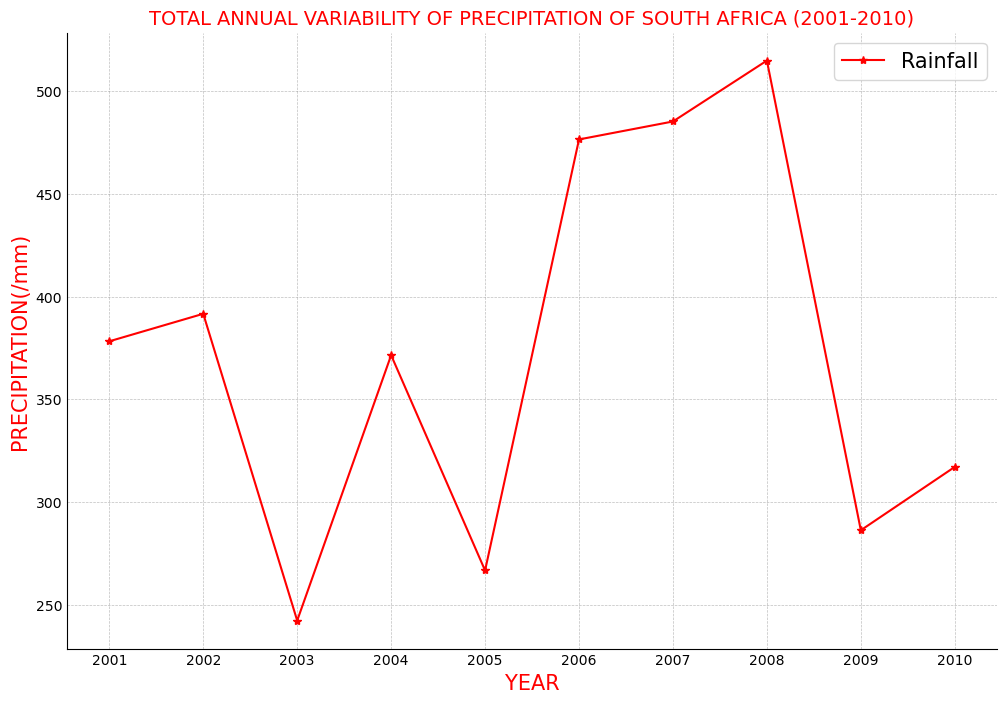

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(Annual_Totals['year'], Annual_Totals['Annual Total Rain'], label='Rainfall', color='red', marker='*')
ax.set_xlabel('YEAR',fontsize=15,color='red')
ax.set_ylabel('PRECIPITATION(/mm)',fontsize=15,color='red')
ax.set_title('TOTAL ANNUAL VARIABILITY OF PRECIPITATION OF SOUTH AFRICA (2001-2010)',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

plt.savefig('00.png');

In [10]:
Annual_climatology=SA_precip.groupby("datetime.year").mean("datetime")
Annual_climatology=Annual_climatology.values
Annual_climatology

array([1.0361644 , 1.0728493 , 0.66375345, 1.0148361 , 0.7305753 ,
       1.3053426 , 1.3292876 , 1.410493  , 0.7841918 , 0.8686575 ],
      dtype=float32)

In [11]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Annual Climatology': Annual_climatology}
Annual_climatology= pd.DataFrame(data=data)
Annual_climatology

year  Annual Climatology
0  2001            1.036164
1  2002            1.072849
2  2003            0.663753
3  2004            1.014836
4  2005            0.730575
5  2006            1.305343
6  2007            1.329288
7  2008            1.410493
8  2009            0.784192
9  2010            0.868658

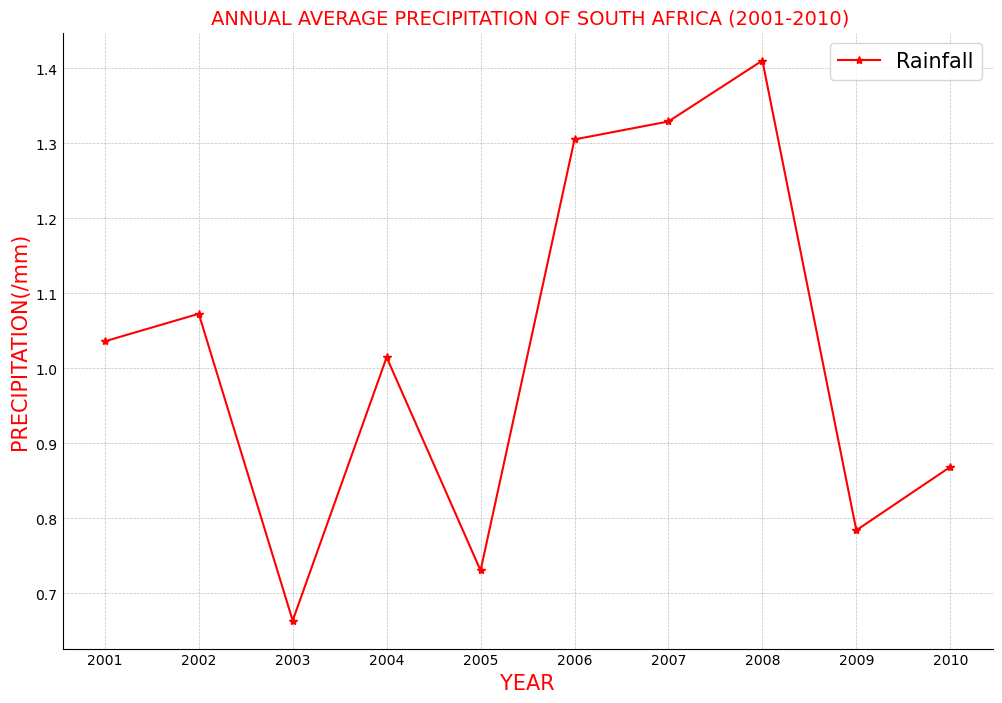

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(Annual_climatology['year'], Annual_climatology['Annual Climatology'], label='Rainfall', color='red', marker='*')
ax.set_xlabel('YEAR',fontsize=15,color='red',)
ax.set_ylabel('PRECIPITATION(/mm)',fontsize=15,color='red')
ax.set_title(' ANNUAL AVERAGE PRECIPITATION OF SOUTH AFRICA (2001-2010)',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('01.png');

In [13]:
da = SA_precip
dry_days_per_yearly = (da < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_yearly=dry_days_per_yearly.values
dry_days_yearly

array([313, 309, 325, 318, 325, 313, 323, 318, 323, 321])

In [14]:
dry_days_yearly

array([313, 309, 325, 318, 325, 313, 323, 318, 323, 321])

In [15]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Dry days': dry_days_yearly}
Dry_days1= pd.DataFrame(data=data)
Dry_days1

year  Dry days
0  2001       313
1  2002       309
2  2003       325
3  2004       318
4  2005       325
5  2006       313
6  2007       323
7  2008       318
8  2009       323
9  2010       321

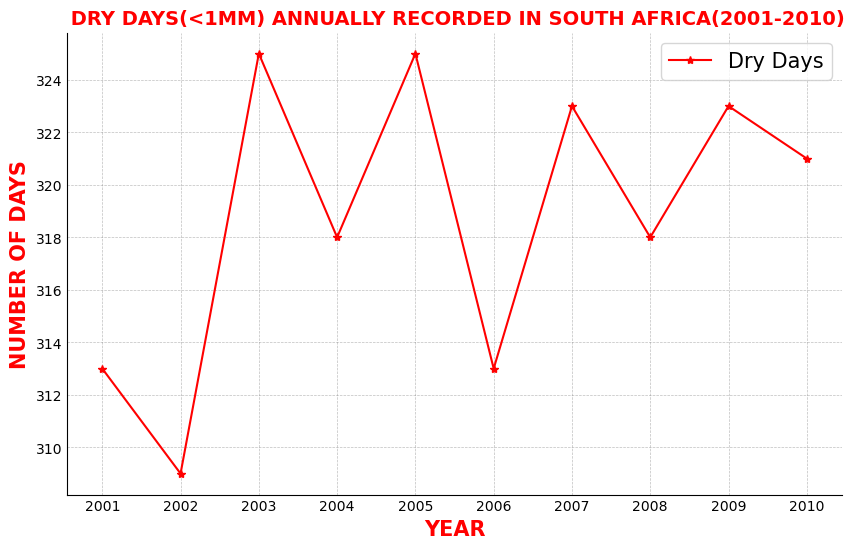

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Dry_days1['year'], Dry_days1['Dry days'], label='Dry Days', color='red', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='red')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' DRY DAYS(<1MM) ANNUALLY RECORDED IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('1.png');

In [17]:
da= SA_precip

# Select the precipitation variable and compute the number of wet days per year
wet_days_per_year = (da >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year 
wet_days_year=wet_days_per_year.values
wet_days_year

array([52, 56, 40, 48, 40, 52, 42, 47, 42, 44])

In [18]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Wet days': wet_days_year}
Wet_days= pd.DataFrame(data=data)
Wet_days

year  Wet days
0  2001        52
1  2002        56
2  2003        40
3  2004        48
4  2005        40
5  2006        52
6  2007        42
7  2008        47
8  2009        42
9  2010        44

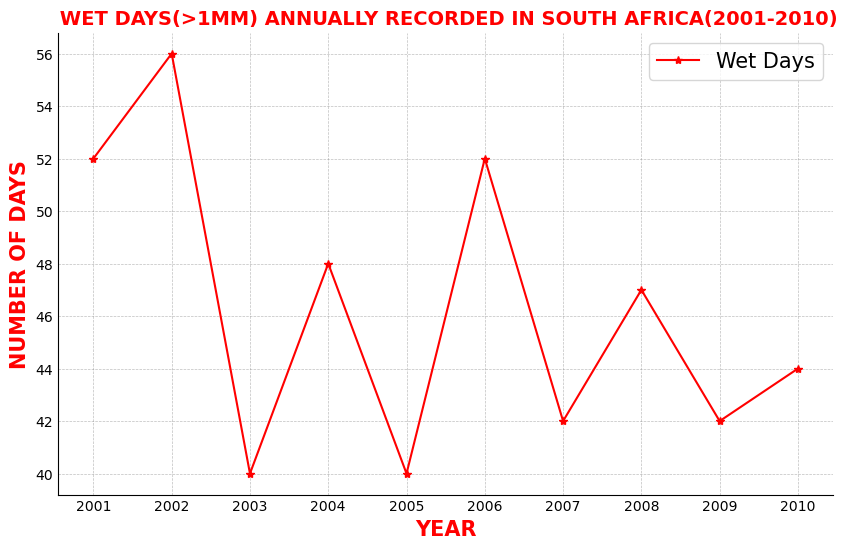

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'], Wet_days['Wet days'], label='Wet Days', color='red', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='red')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' WET DAYS(>1MM) ANNUALLY RECORDED IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('2.png');

In [20]:
da =SA_precip 

# Select the precipitation variable and compute the number of dry days per year
wet_days_per_month = (da>=1).groupby('datetime.month').sum(dim='datetime')
wet_days_month=wet_days_per_month.values
wet_days_month

array([62, 62, 56, 51, 33, 18,  6, 14, 21, 48, 51, 41])

In [21]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'wet days': wet_days_month}
Wet_days= pd.DataFrame(data=data)
Wet_days

months  wet days
0     Jan        62
1     Feb        62
2     Mar        56
3     Apr        51
4     May        33
5     Jun        18
6    July         6
7     Aug        14
8    Sept        21
9     Oct        48
10    Nov        51
11    Dec        41

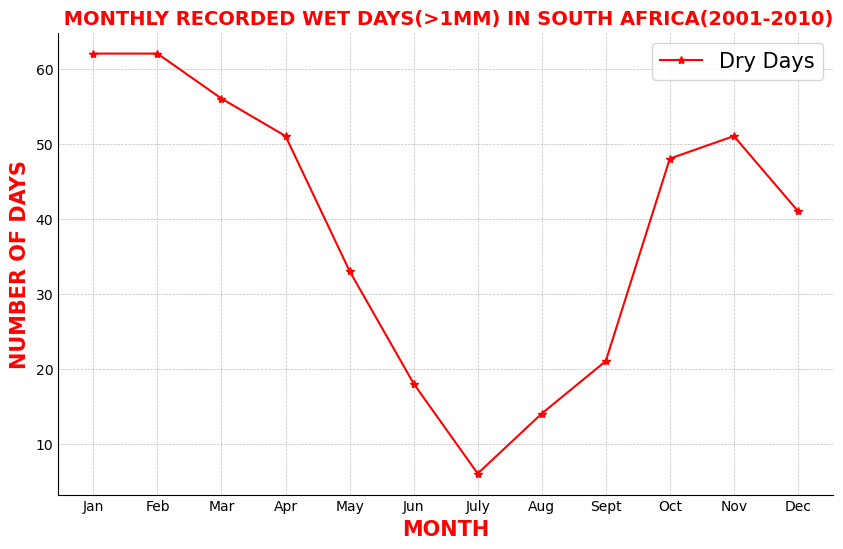

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'], Wet_days['wet days'], label='Dry Days', color='red', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='red')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' MONTHLY RECORDED WET DAYS(>1MM) IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

In [23]:
da = SA_precip
dry_days_per_month = (da <1).groupby('datetime.month').sum(dim='datetime')
dry_days_month=dry_days_per_month.values
dry_days_month

array([248, 220, 253, 249, 277, 282, 304, 296, 279, 262, 249, 269])

In [24]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'dry days': dry_days_month}
Dry_days= pd.DataFrame(data=data)
Dry_days

months  dry days
0     Jan       248
1     Feb       220
2     Mar       253
3     Apr       249
4     May       277
5     Jun       282
6    July       304
7     Aug       296
8    Sept       279
9     Oct       262
10    Nov       249
11    Dec       269

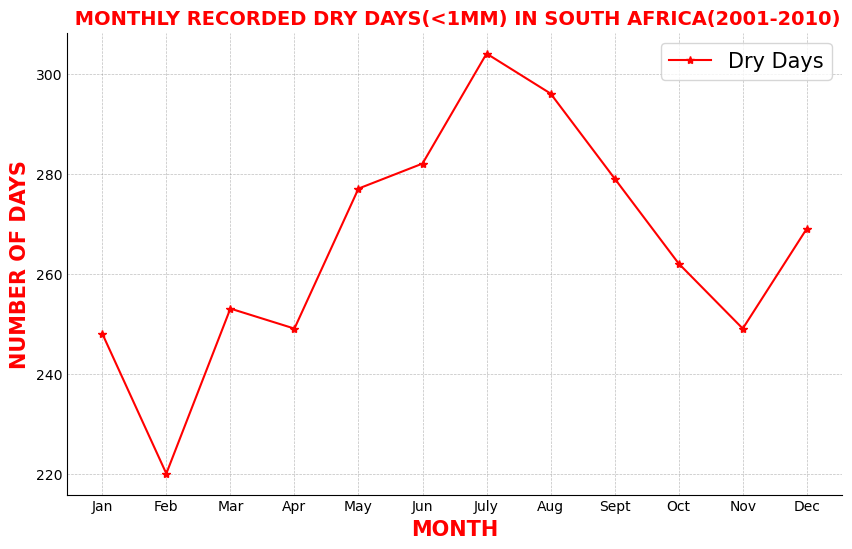

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Dry_days['months'], Dry_days['dry days'], label='Dry Days', color='red', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='red')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' MONTHLY RECORDED DRY DAYS(<1MM) IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('3.png');

# EXTREME DRY AND WET INDICES(>10MM,>20MM)

In [26]:
extreme_rain_10mm=da.where(da>10).groupby('datetime.year').count()
extreme_rain_10mm=extreme_rain_10mm.values
extreme_rain_10mm

array([12, 11,  6, 14,  9, 14, 14, 15,  6,  8])

In [27]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Wet days':extreme_rain_10mm}
Wet_days= pd.DataFrame(data=data)
Wet_days

year  Wet days
0  2001        12
1  2002        11
2  2003         6
3  2004        14
4  2005         9
5  2006        14
6  2007        14
7  2008        15
8  2009         6
9  2010         8

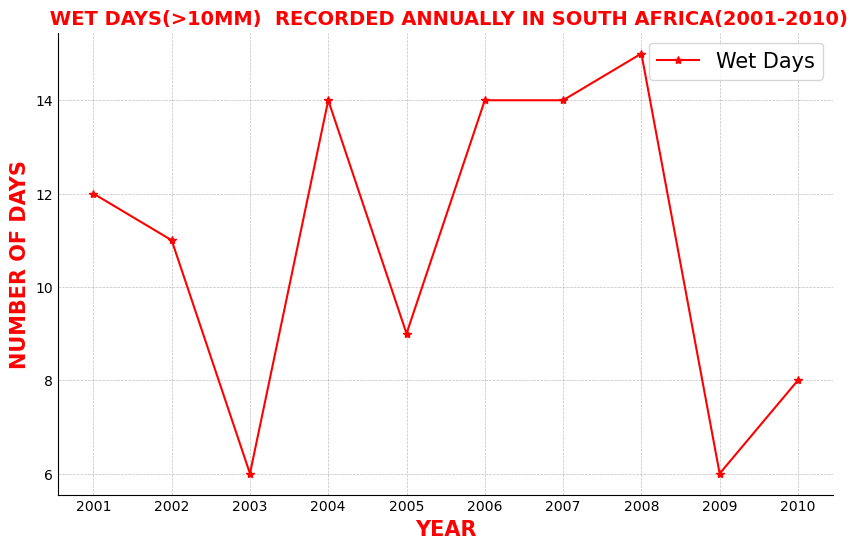

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'],Wet_days['Wet days'], label='Wet Days', color='red', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='red',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' WET DAYS(>10MM)  RECORDED ANNUALLY IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('4.png');

In [29]:
extreme_rain_20mm=da.where(da>20).groupby('datetime.year').count()
extreme_rain_20mm=extreme_rain_20mm.values
extreme_rain_20mm

array([4, 5, 1, 5, 1, 6, 9, 9, 4, 2])

In [30]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Wet days':extreme_rain_20mm}
Wet_days= pd.DataFrame(data=data)
Wet_days

year  Wet days
0  2001         4
1  2002         5
2  2003         1
3  2004         5
4  2005         1
5  2006         6
6  2007         9
7  2008         9
8  2009         4
9  2010         2

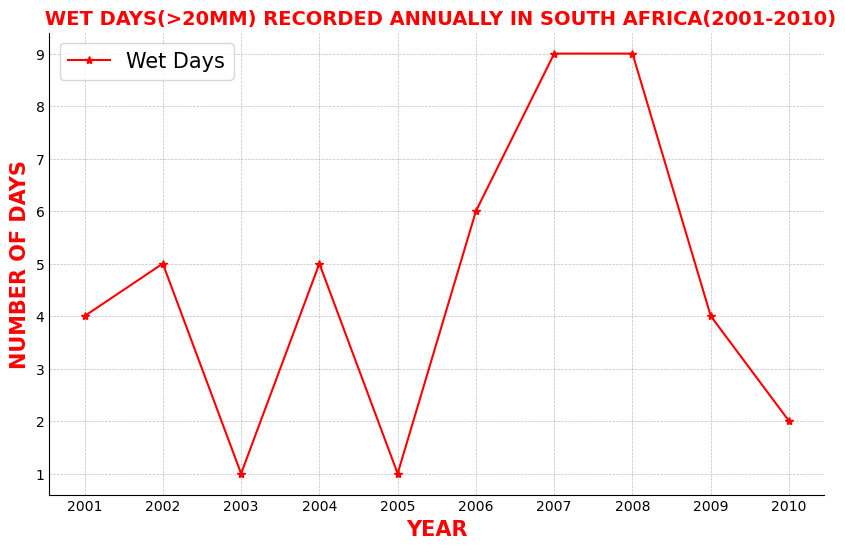

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'],Wet_days['Wet days'], label='Wet Days', color='red', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='red',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' WET DAYS(>20MM) RECORDED ANNUALLY IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('5.png');

In [32]:
extreme_rain_10mm=da.where(da>10).groupby('datetime.month').count()
extreme_rain_10mm=extreme_rain_10mm.values
extreme_rain_10mm

array([18, 15, 15, 15,  5,  1,  0,  0,  1, 15, 11, 13])

In [33]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'wet days':extreme_rain_10mm }
Wet_days= pd.DataFrame(data=data)
Wet_days

months  wet days
0     Jan        18
1     Feb        15
2     Mar        15
3     Apr        15
4     May         5
5     Jun         1
6    July         0
7     Aug         0
8    Sept         1
9     Oct        15
10    Nov        11
11    Dec        13

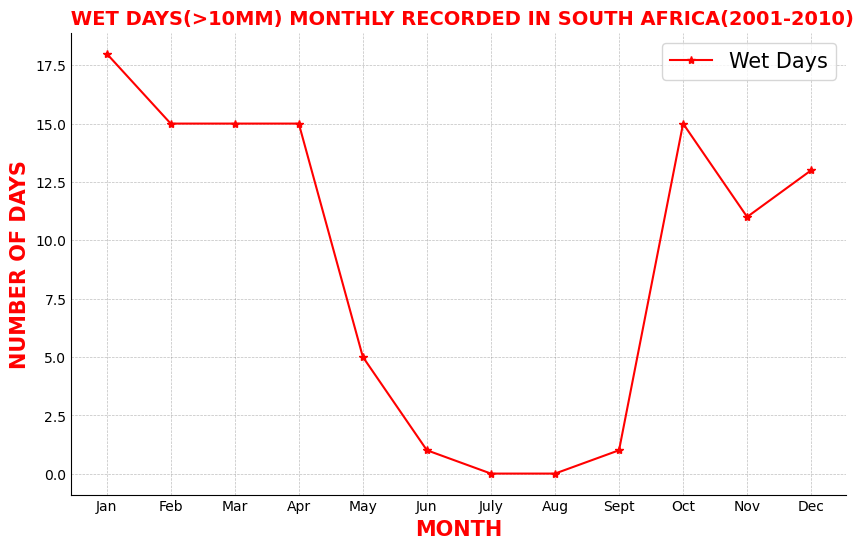

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'],Wet_days['wet days'], label='Wet Days', color='red', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='red',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' WET DAYS(>10MM) MONTHLY RECORDED IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('6.png');

In [35]:
extreme_rain_20mm=da.where(da>20).groupby('datetime.month').count()
extreme_rain_20mm=extreme_rain_20mm.values
extreme_rain_20mm

array([7, 5, 8, 3, 2, 0, 0, 0, 0, 7, 5, 9])

In [36]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 
        'wet days':extreme_rain_20mm }
Wet_days= pd.DataFrame(data=data)
Wet_days


months  wet days
0     Jan         7
1     Feb         5
2     Mar         8
3     Apr         3
4     May         2
5     Jun         0
6    July         0
7     Aug         0
8    Sept         0
9     Oct         7
10    Nov         5
11    Dec         9

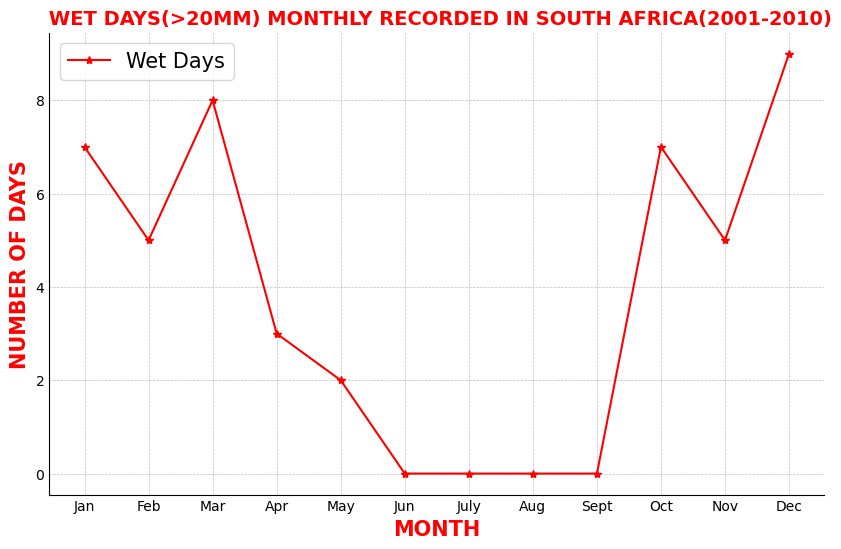

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'],Wet_days['wet days'], label='Wet Days', color='red', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='red',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='red')
ax.set_title(' WET DAYS(>20MM) MONTHLY RECORDED IN SOUTH AFRICA(2001-2010)',fontweight='bold',fontsize=14,color='red')
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('7.png');

# SPATIAL 


In [38]:
SA_data=xr.open_dataset('South_Africa.nc')


In [39]:
SA_precip1=SA_data['precip']
SA_precip1

<xarray.DataArray 'precip' (datetime: 3652, lat: 53, lon: 68)>
[13161808 values with dtype=float32]
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 16.25 16.5 16.75 17.0 ... 32.25 32.5 32.75 33.0
  * lat       (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
Attributes:
    grid_mapping:  crs

In [40]:
SA_precip1=SA_precip1.where(SA_precip1 !=-99.0)
SA_precip1

<xarray.DataArray 'precip' (datetime: 3652, lat: 53, lon: 68)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 16.25 16.5 16.75 17.0 ... 32.25 32.5 32.75 33.0
  * lat       (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
Attributes:
    grid_mapping:  crs

In [41]:
ds=SA_precip1
# Select the precipitation variable and compute the number of dry days per year
dry_days_per_year = (ds <1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year

<xarray.DataArray 'precip' (year: 10, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

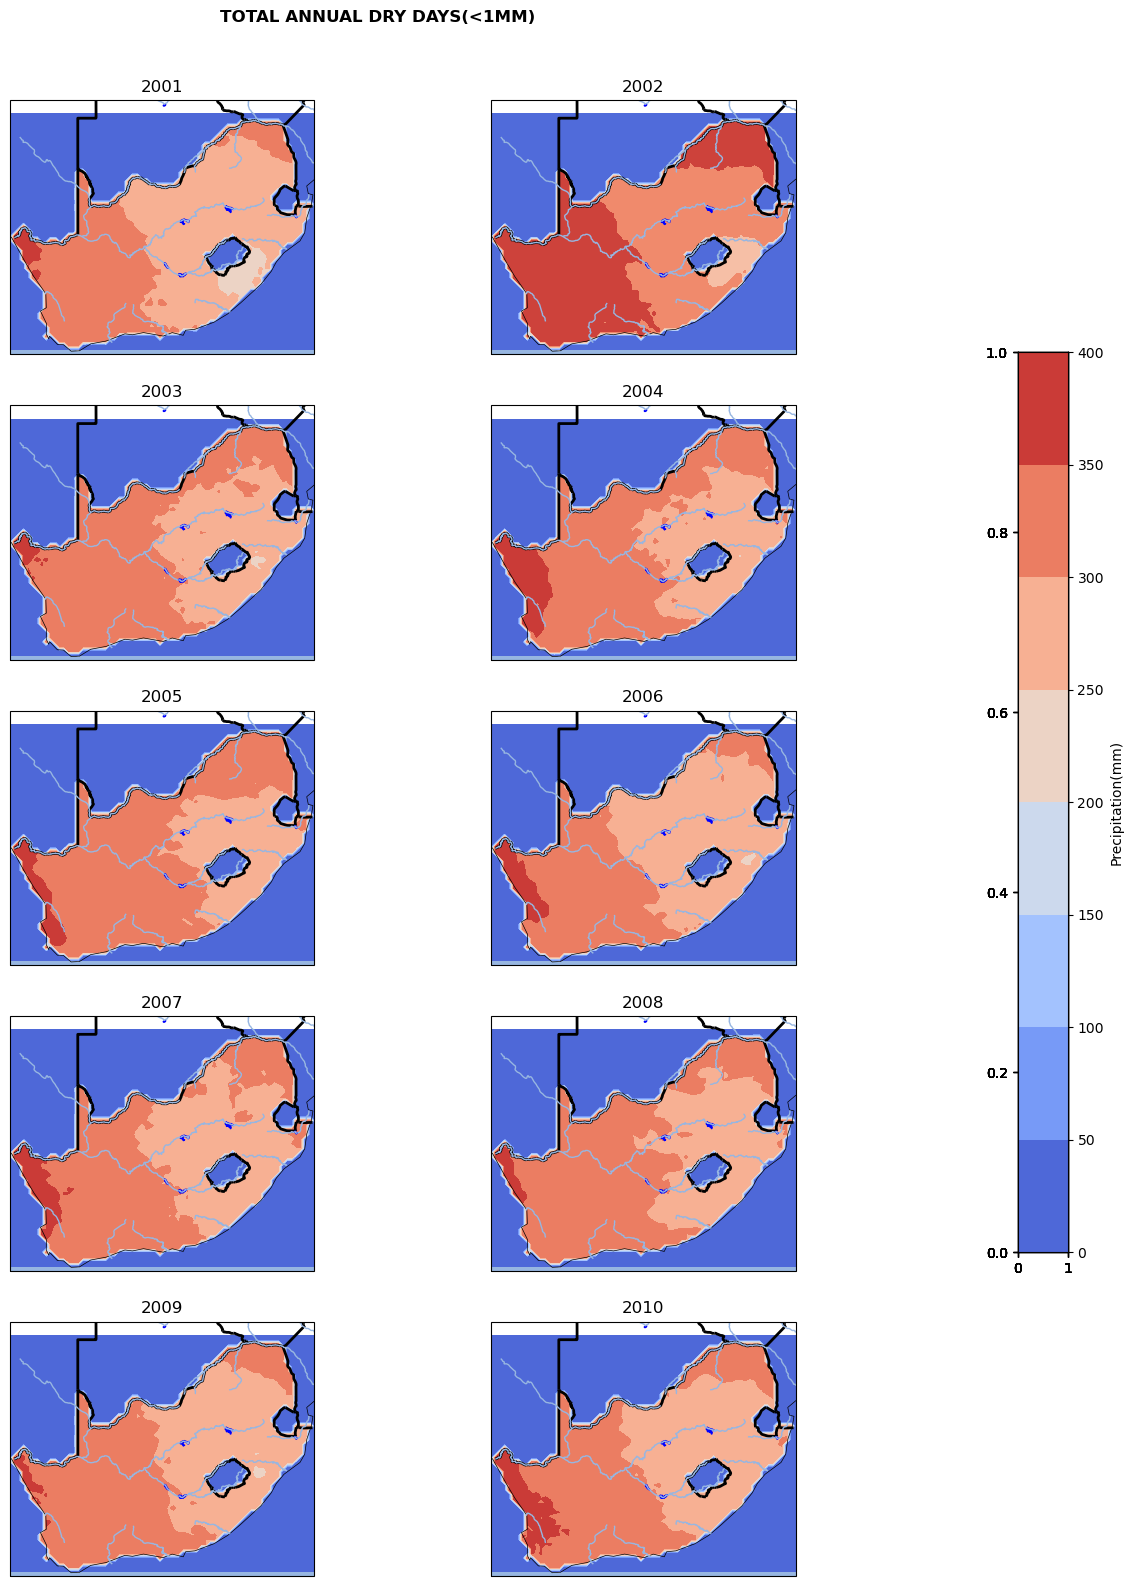

In [42]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(year[i])
    cb= ax[i].contourf(dry_days_per_year.lon,dry_days_per_year.lat,dry_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS(<1MM)', fontweight='bold');
plt.savefig('7.png');

In [43]:
ds = SA_precip1
wet_days_per_year = (ds >= 1).groupby('datetime.year').sum(dim='datetime')

In [44]:
wet_days_per_year

<xarray.DataArray 'precip' (year: 10, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

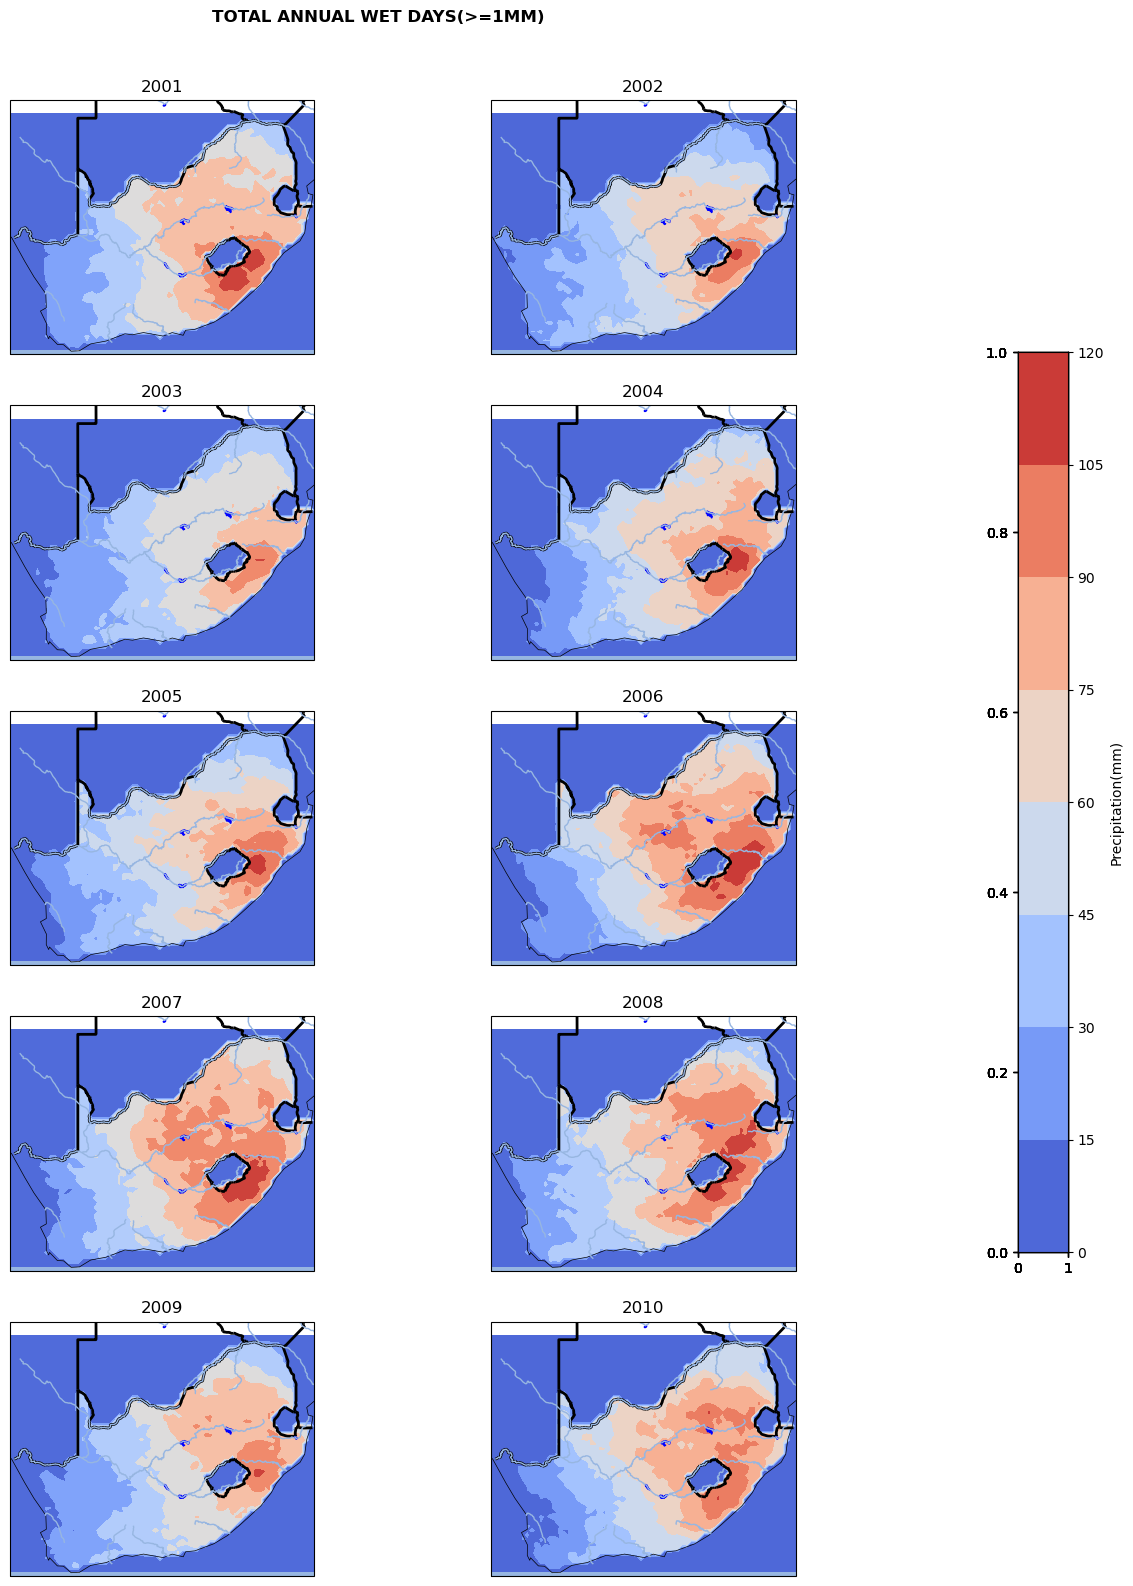

In [45]:
  fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(year[i])
    cb= ax[i].contourf(wet_days_per_year.lon,wet_days_per_year.lat,wet_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS(>=1MM)', fontweight='bold');
plt.savefig('8.png');

In [46]:
wet_days_per_year1 = (ds>10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year1

<xarray.DataArray 'precip' (year: 10, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

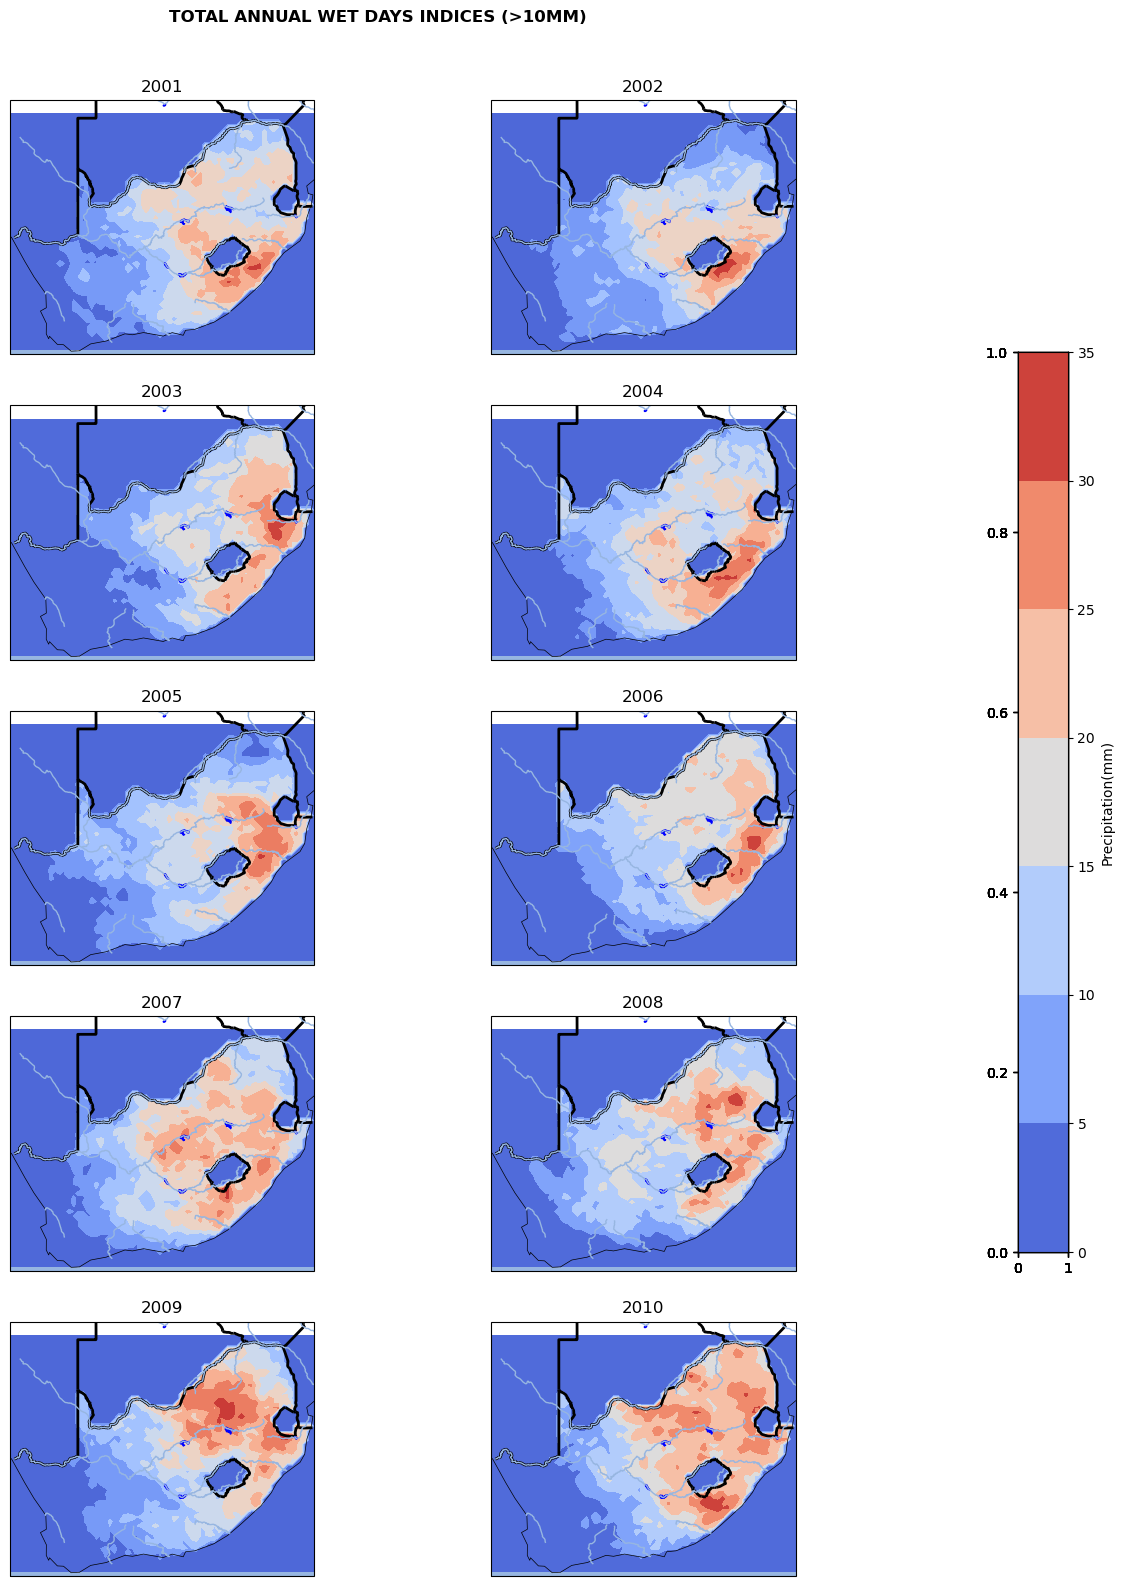

In [47]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0 ], crs=ccrs.PlateCarree())
    ax[i].set_title(year[i])
    cb= ax[i].contourf(wet_days_per_year1.lon,wet_days_per_year1.lat,wet_days_per_year1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>10MM)', fontweight='bold');
plt.savefig('9.png');


In [48]:
wet_days_per_year2 = (ds>20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year2

<xarray.DataArray 'precip' (year: 10, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

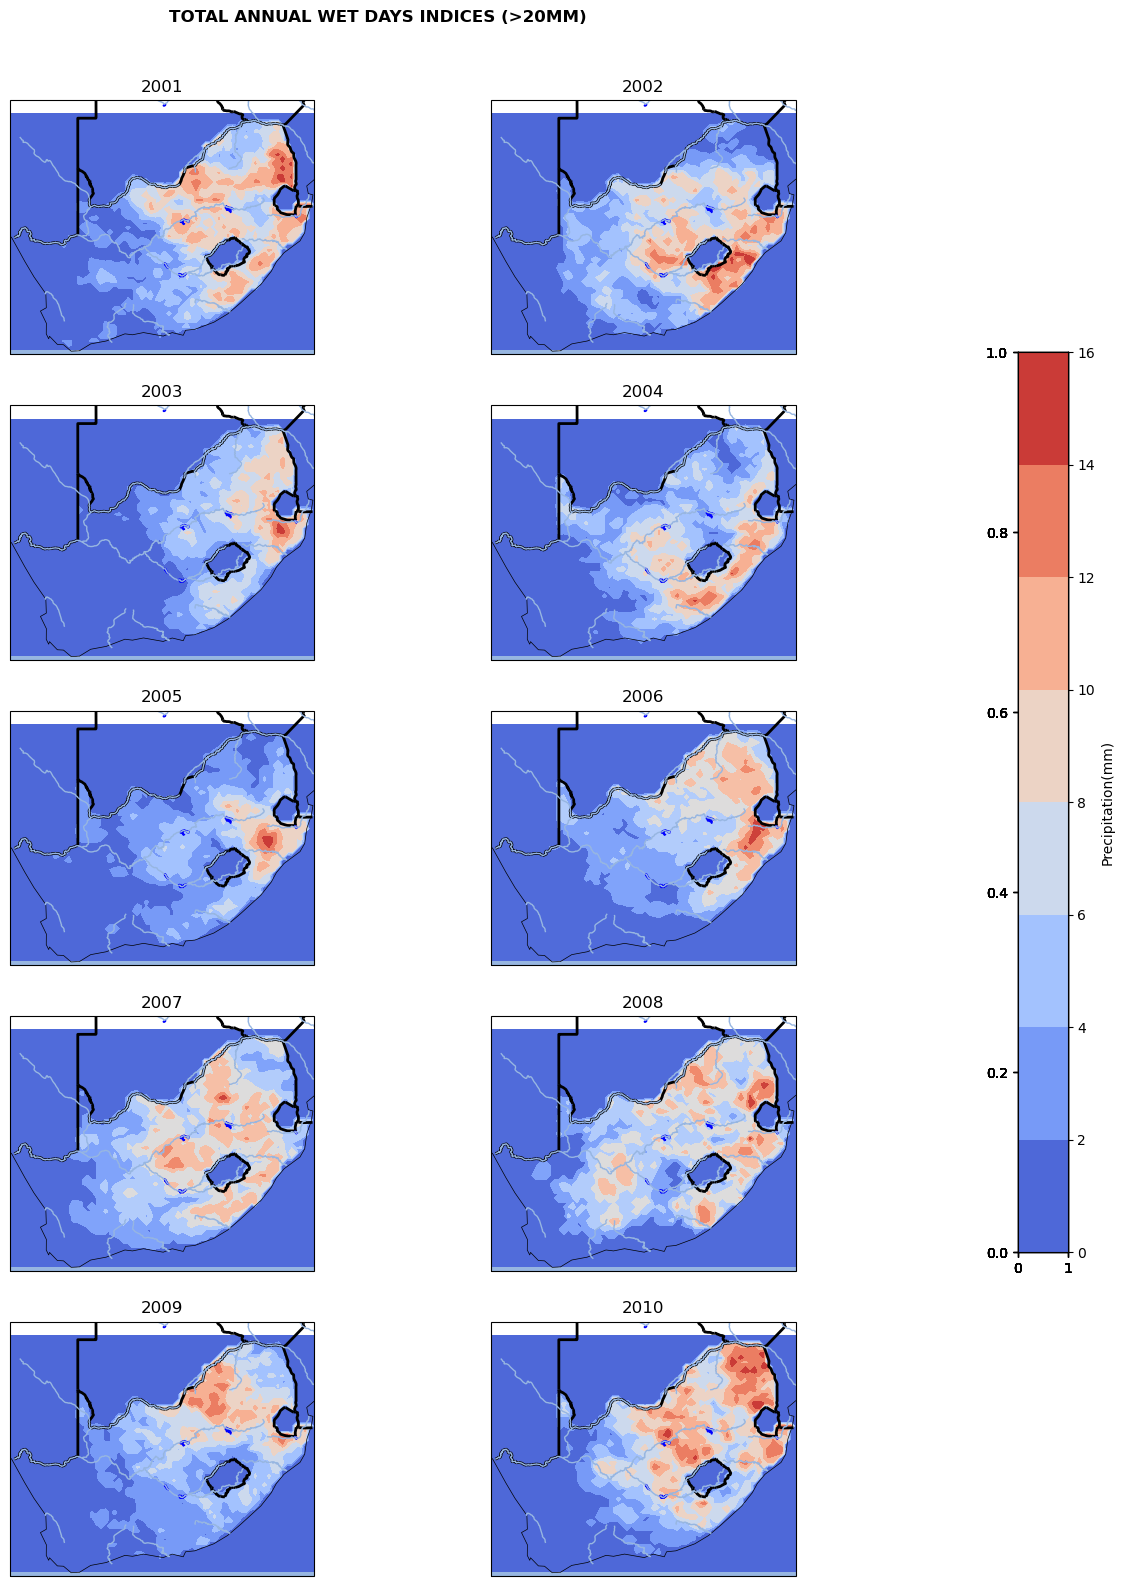

In [49]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year_names=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon,wet_days_per_year2.lat,wet_days_per_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>20MM)', fontweight='bold');
plt.savefig('10.png');

In [50]:
wet_days_per_month1= (ds>1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1

<xarray.DataArray 'precip' (month: 12, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

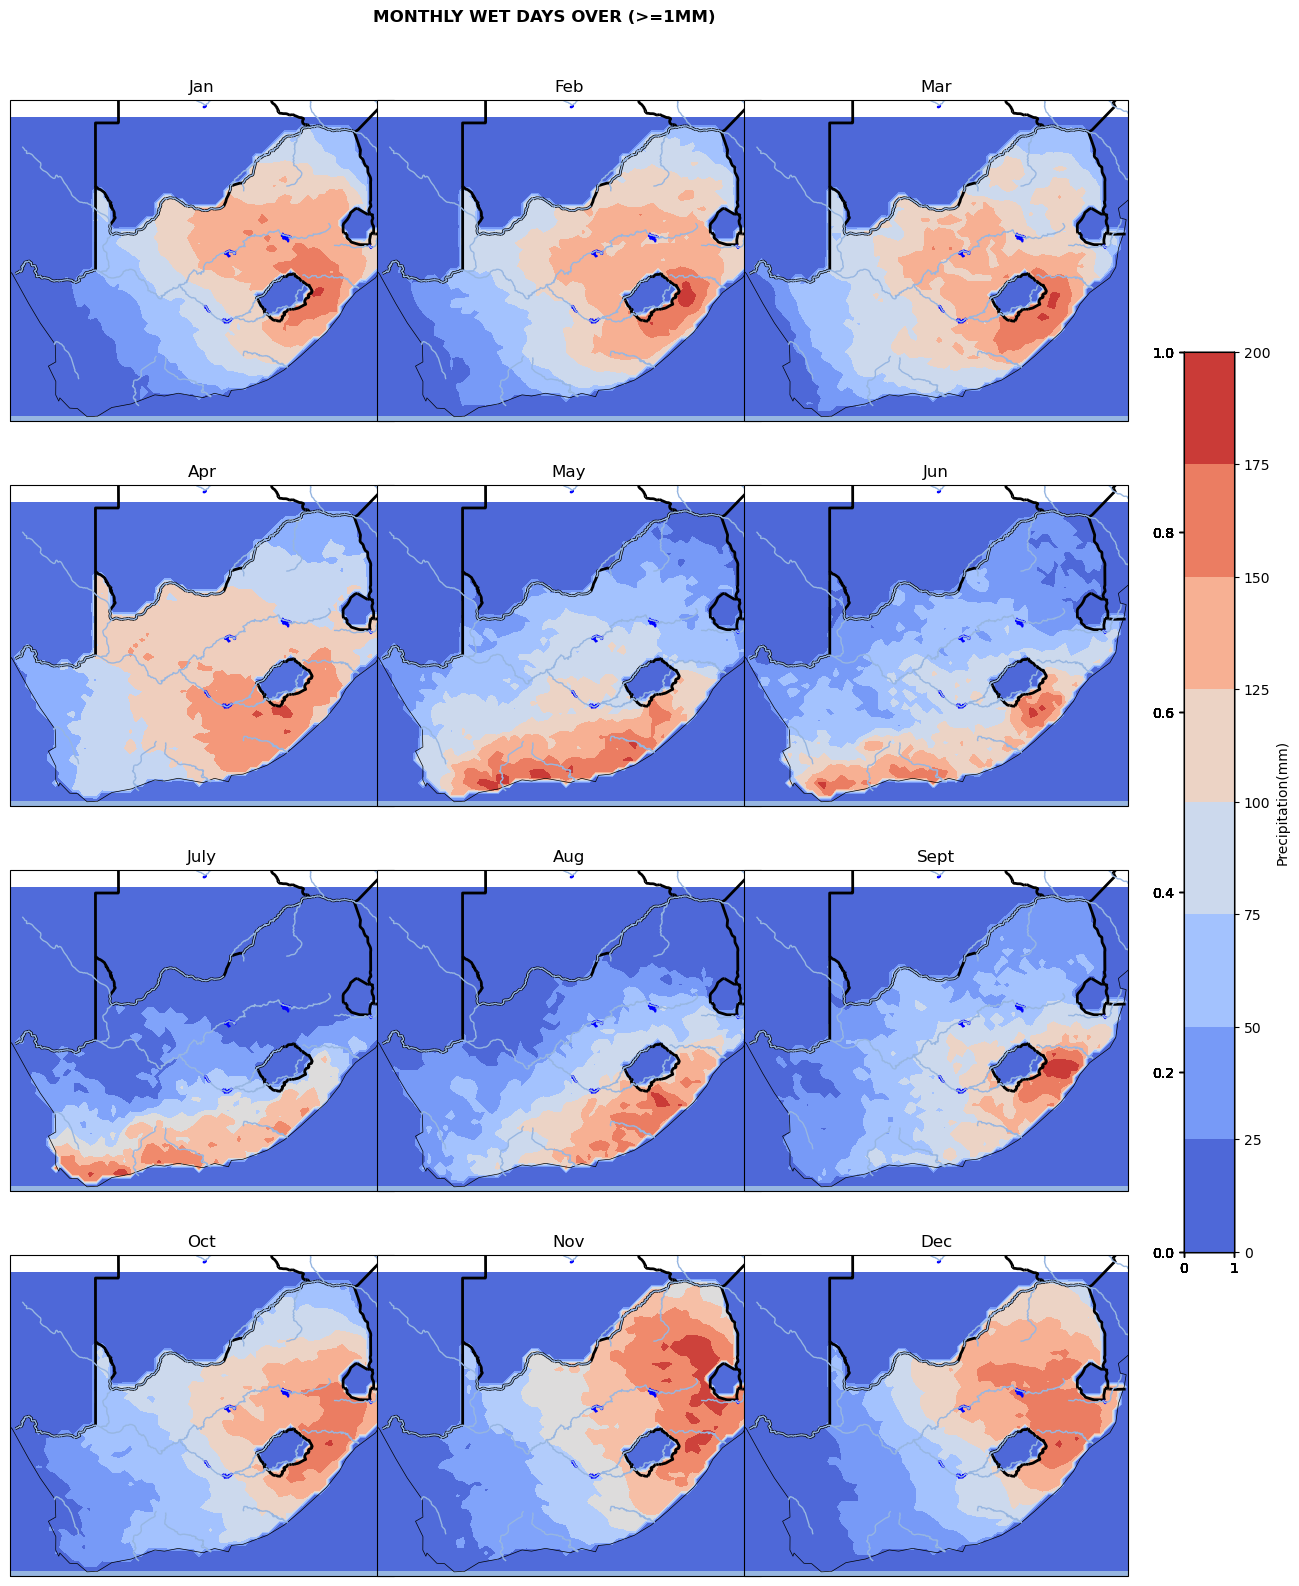

In [51]:
fig,ax=plt.subplots(4,3,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER (>=1MM)', fontweight='bold');
plt.savefig('11.png');

In [52]:
dry_days_per_month2= (ds<=1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

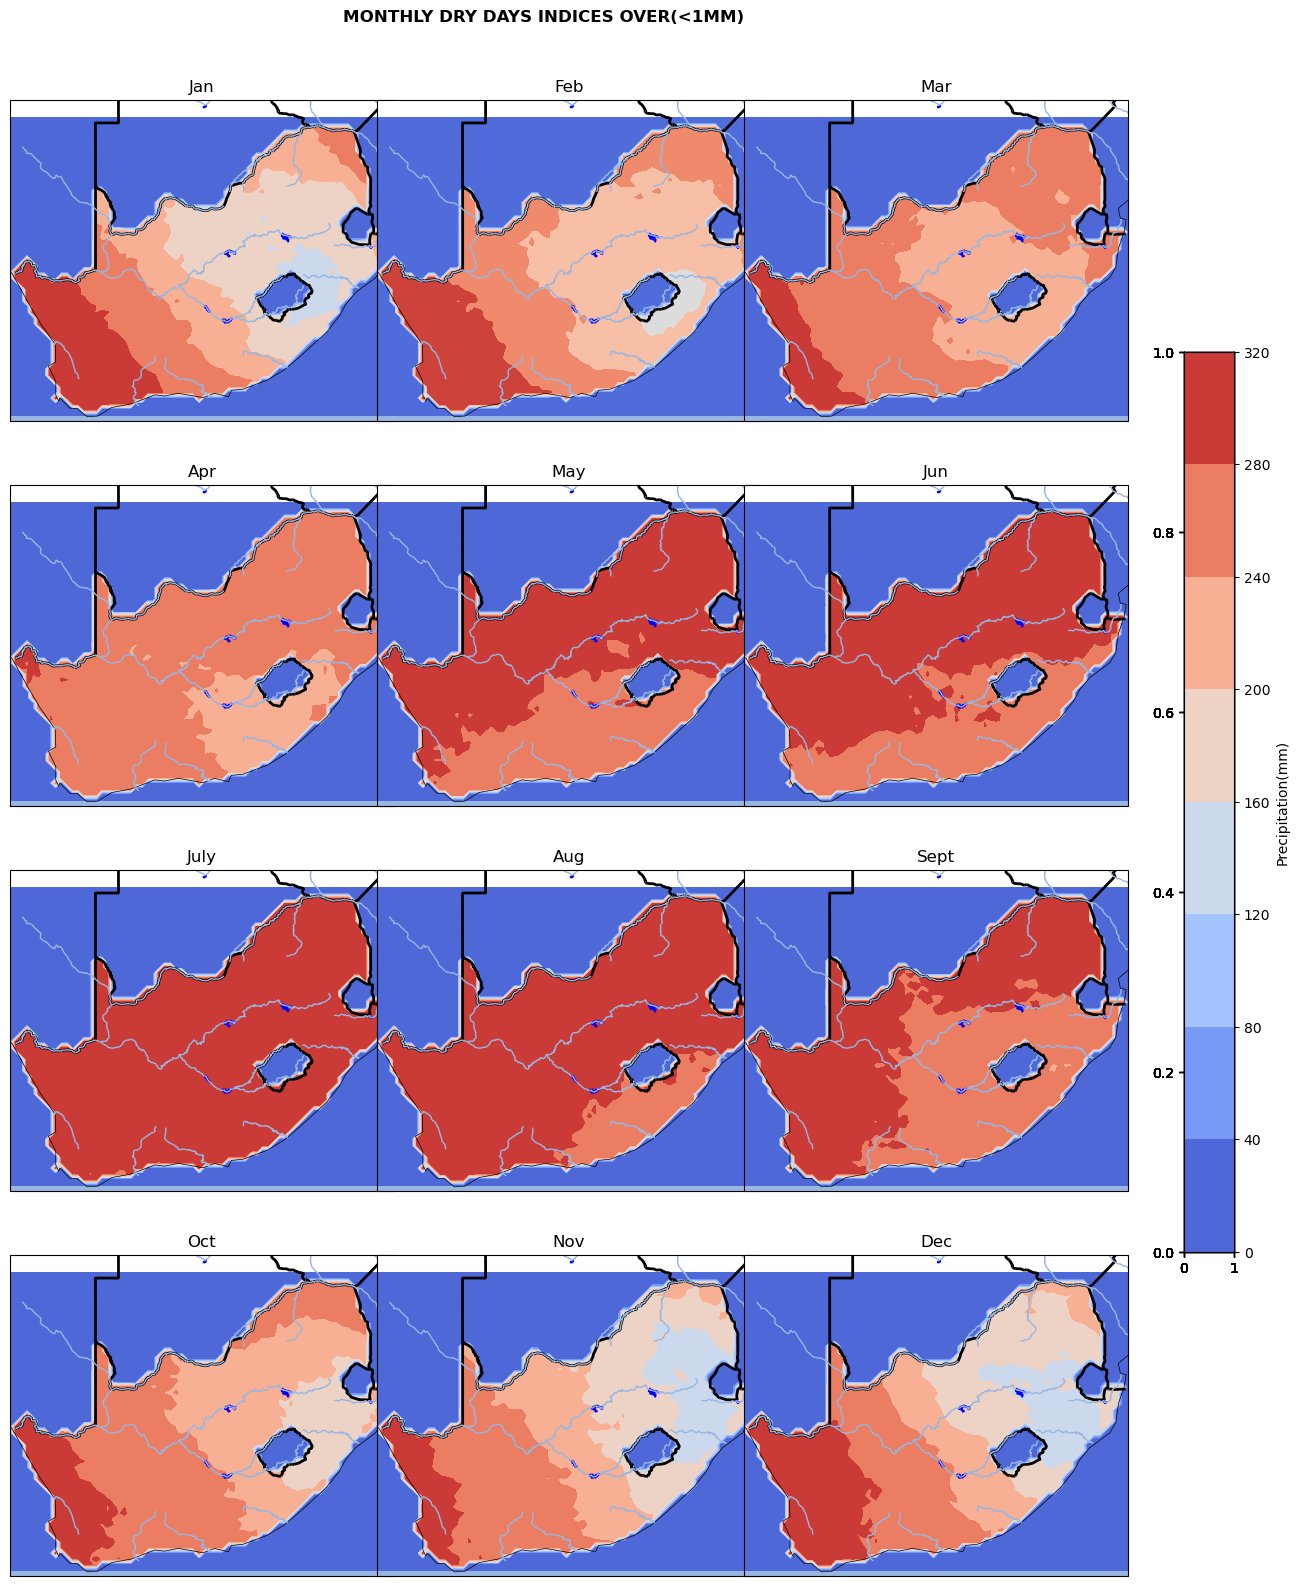

In [53]:
fig,ax=plt.subplots(4,3,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_month2.lon,dry_days_per_month2.lat,dry_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(<1MM)', fontweight='bold');
plt.savefig('12.png');

In [54]:
wet_days_per_month2= (ds>10).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

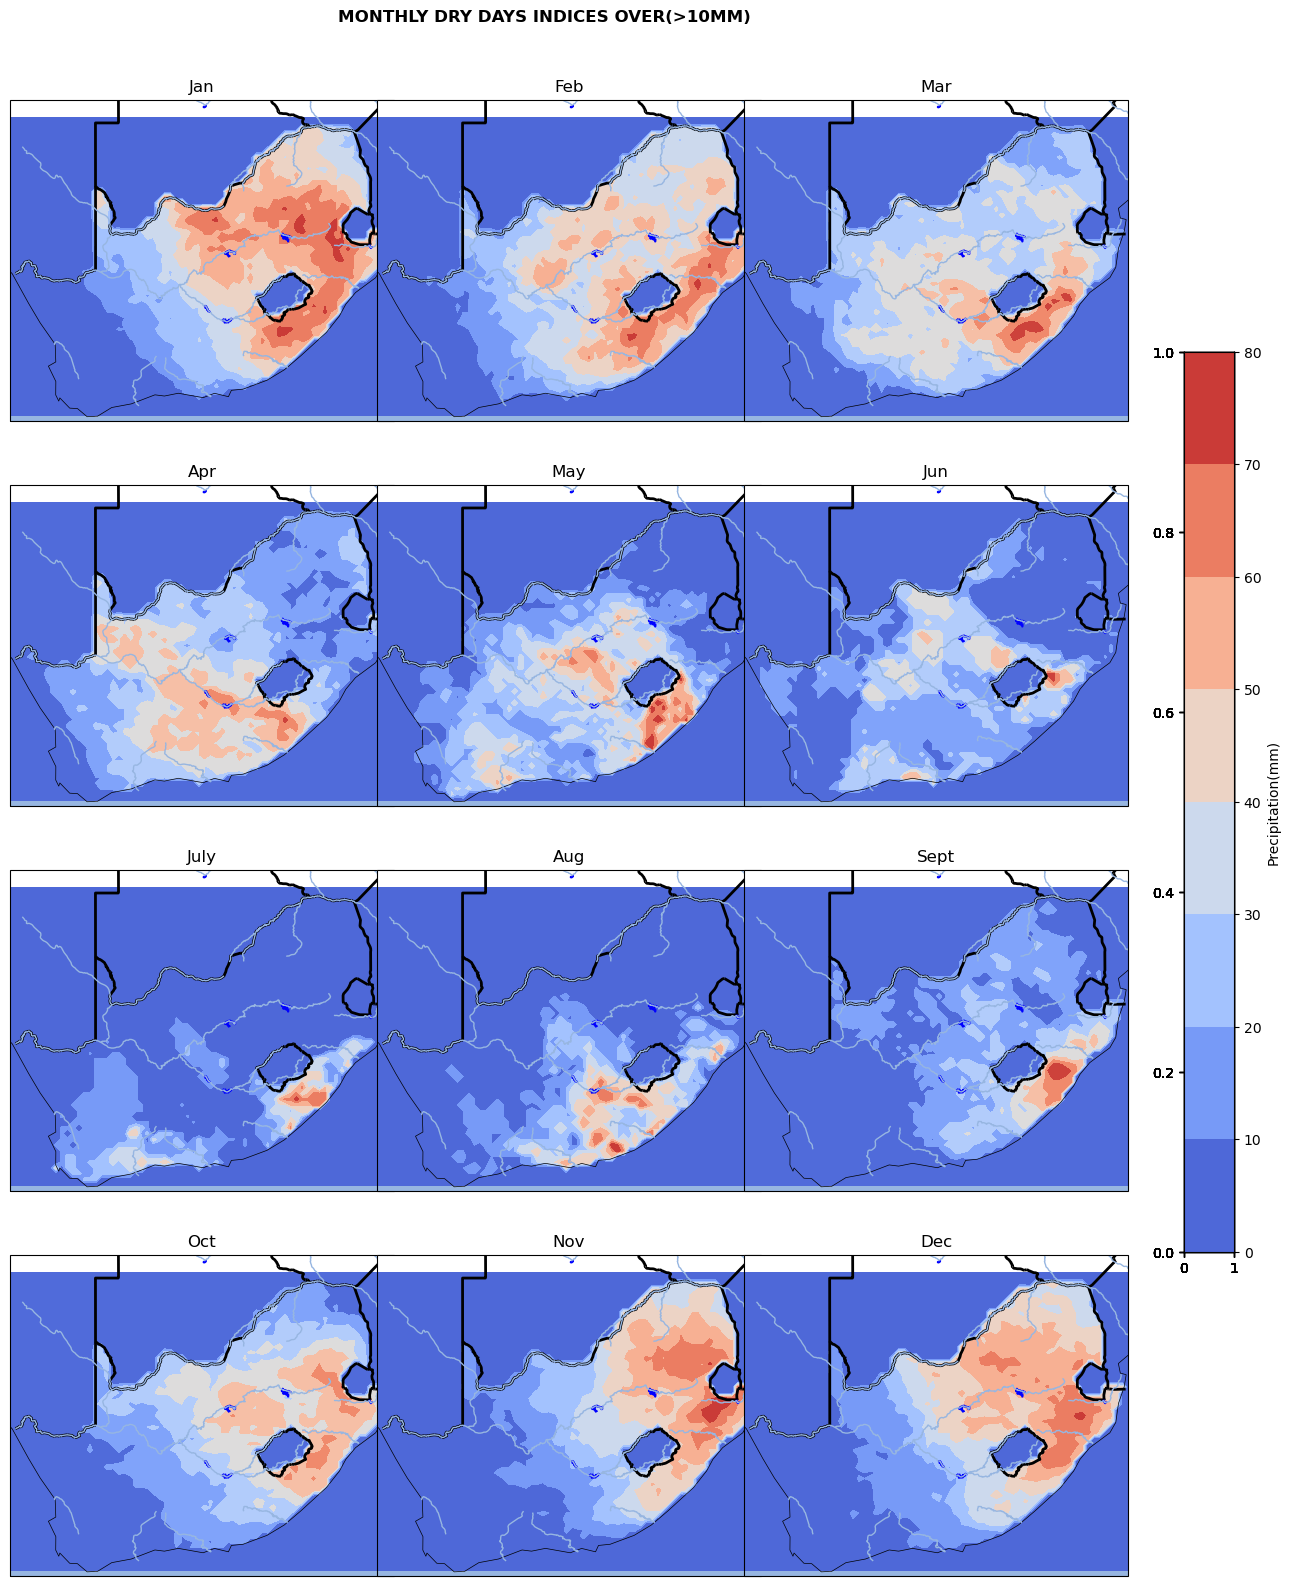

In [55]:
fig,ax=plt.subplots(4,3,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month2.lon,wet_days_per_month2.lat,wet_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(>10MM)', fontweight='bold');#
plt.savefig('13.png');

In [56]:
wet_days_per_month3= (ds>20).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month3

<xarray.DataArray 'precip' (month: 12, lat: 53, lon: 68)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 16.25 16.5 16.75 17.0 17.25 ... 32.25 32.5 32.75 33.0
  * lat      (lat) float32 -21.75 -22.0 -22.25 -22.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

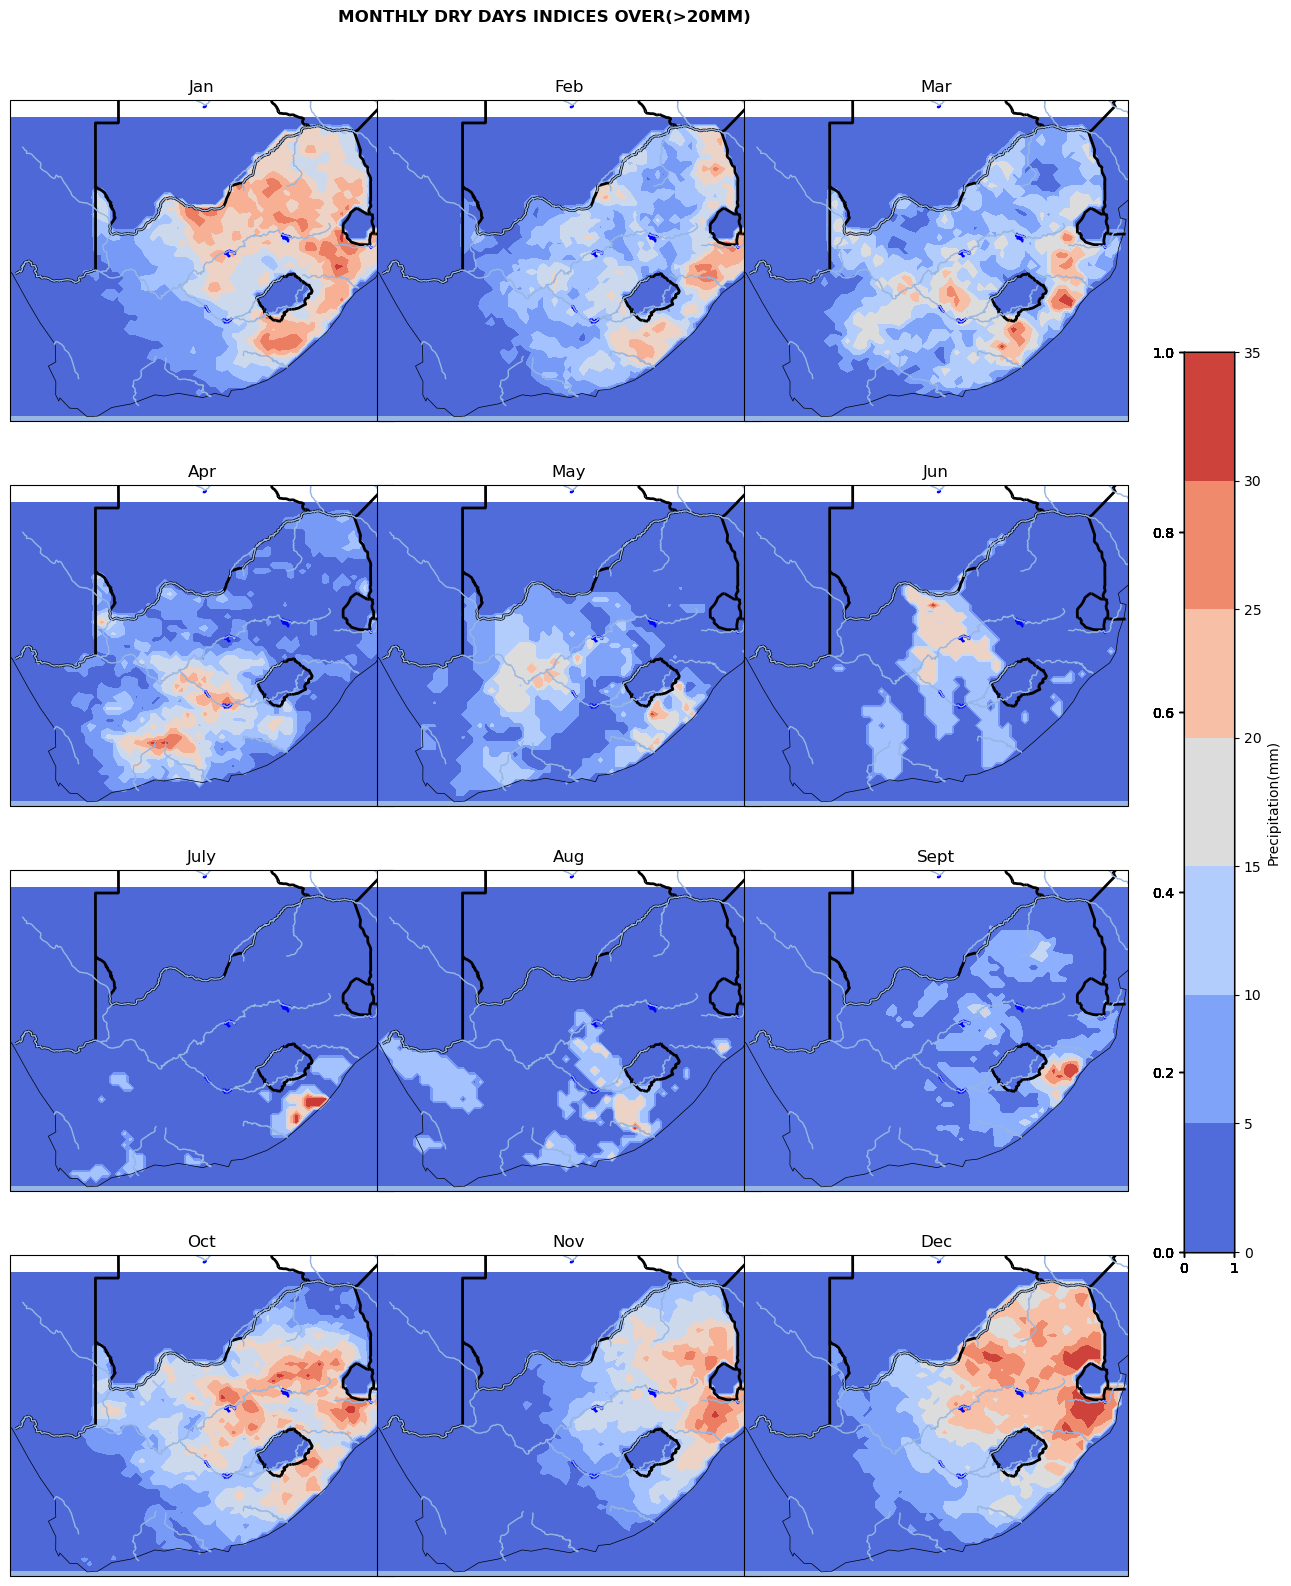

In [57]:
fig,ax=plt.subplots(4,3,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([16.25, 33,-21,-35.0], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month3.lon,wet_days_per_month3.lat,wet_days_per_month3[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(>20MM)', fontweight='bold');
plt.savefig('14.png');